In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# JMP's implementation of the ST-FDR (q-value)
def stfdr(p, nBoot=100):
    # set random state
    np.random.RandomState(0)
    
    d = 0.01
    lam = np.arange(0, max(p) + d/2, d)
    m = len(p)
    
    ii = np.argsort(p)
    p = np.sort(p)
    
    pi_0hat = pi0computer(p,lam,m)
    rem = np.isnan(pi_0hat)
    lam = lam[~rem]
    pi_0hat = pi_0hat[~rem]
    
    mpi_0hat = np.min(pi_0hat)
    pboot = bootsamp(p, m * nBoot).reshape(m, nBoot)
    
    mse = np.zeros_like(lam)
    for j in range(nBoot):
        pi_0hatboot = pi0computer(pboot[:, j], lam, m)
        mse += (pi_0hatboot - mpi_0hat) ** 2
    
    lm = LocalMaxMin(mse)
    lmse = lm * (np.max(mse) - mse)
    min_lmse_idx = np.where(lmse == np.min(lmse))[0]
    pi_0 = np.min(pi_0hatboot[min_lmse_idx])
    
    q = compute_q(p, pi_0, m)
    q[ii] = q
    return q, pi_0

def pi0computer(p, lam, m):
    pi_0hat = np.zeros_like(lam)
    
    for k in range(len(lam)):
        pi_0hat[k] = np.sum(p > lam[k]) / (m * (1 - lam[k]))
    
    return pi_0hat

def bootsamp(x, ns):
    x = np.array(x).flatten()
    n = len(x)
    s = np.random.rand(ns)
    n_idx = np.digitize(s, np.linspace(0, 1, n+1)) - 1
    s = x[n_idx]
    return s

def LocalMaxMin(vec):
    scores = np.zeros_like(vec, dtype=int)
    
    for i in range(len(vec)):
        if i == 0:
            # First element
            scores[i] = 0 
            #if vec[i] > vec[i+1]:
            #    scores[i] = 1
            #elif vec[i] < vec[i+1]:
            #    scores[i] = -1
        elif i == len(vec) - 1:
            # Last element
            scores[i] = 0 
            #if vec[i] > vec[i-1]:
            #    scores[i] = 1
            #elif vec[i] < vec[i-1]:
            #    scores[i] = -1
        else:
            # All other elements
            scores[i] = 0
            if vec[i] > vec[i-1] and vec[i] > vec[i+1]:
                scores[i] = 1
            elif vec[i] < vec[i-1] and vec[i] < vec[i+1]:
                scores[i] = -1
        
    return scores

def compute_q(p, pi_0, m):
    sf = np.arange(1, m+1)
    q = pi_0 * ((p * m) / sf)

    for k in range(m-2, -1, -1):
        if q[k] > q[k+1]:
            q[k] = q[k+1]

    return q

In [4]:
# aggregated counts
counts = np.array([1,1,1,1,3,1,1,2,4.14285714285714,9.15476190476191,1,1,4,3,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,2,4,1,1,4.50000000000000,1,1.66666666666667,1.66666666666667,3.66666666666667,6.65520833333333,2,13.6205654761905,3,2,1,1,14.2637338546530,7.86666666666667,5.14444444444444,6.40000000000000,1,1,1,3,1,10.1444444444444,6.07222222222222,2,6.57142857142857,8.57142857142857,5.57142857142857,1,2,2,3,1,1,1,3,1,1,1,1,1,1,1,1,1,4.16666666666667,1,2,1,1,1,2,1,1,1,1,1,1,5.16666666666667,3.38888888888889,3.38888888888889,1,1,2,1,2,1,1,6.28095238095238,2.80000000000000,5,1,1,7,3,1,1,1,5,3.33333333333333,2.16666666666667,1,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,4.28000000000000,9.40000000000000,1,1,5,5,1,1,1,1,1,3.38888888888889,2,1,1,2,8,8,1,1,1,4.28095238095238,1,1,2.10000000000000,4,3,3,4,3,1,2,2,2,1,1,1,4,5,8,8,4,1,1,1,6.74111111111111,2,1,2,1,1,3,1,1,1,1,2,2,2,4,1,4,1,1,1,1,1,1,1,1,1,1,1,1,4.50000000000000,1,1,1,7,2,1,1,1,2,2.66666666666667,4.37500000000000,7.64375000000000,2,7,1,1,2,1,1,1,1,1,3,3,3,2,1,1,1,1,5,1,1,2,2,2,2,2,4,4,1,2,1,1,1,4,1,4.50000000000000,4.50000000000000,1,1,1,1,1,2,2,2,1,1,1,2,1,2,1,1,1,2.16666666666667,3.00000000000000,1,1,1,2,3,1,3,1,1,1,5.50000000000000,2,2,2,2,1,1,1,1,1,1,1,1,2.66666666666667,4.66666666666667,1,1,1,1,1,2,2,1,2,2,1.33333333333333,2,1,1,2,2,2,2,1,1,2,2,1,1,7.00000000000000,1,1,1,1,1,5,1,1,1,14.2470370370370,1,1,3,1,4,3,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,2,2,1,1,1,1,2,2,3,1,2,2,3,9,9,2,2,8.20000000000000,8.20000000000000,1,1,1,2,1,3,1,1,2,1,1,1,1,1,2,1,2,1,1,1,1,2,2,1,1,1,2,7.00000000000000,1,1,1,1,1,1,4.50000000000000,4.50000000000000,1,1,4,1,1,1,1,1,1.57142857142857,1,1,2,4.38703248521631]).T

In [5]:
# taxonomic rank for each element in counts
taxrank = ['Species','Species','Family','Order','Genus','Genus','Family','Order','Class','Phylum','Family','Order','Genus','Species','Genus','Species','Genus','Family','Genus','Species','Genus','Species','Genus','Class','Genus','Species','Genus','Species','Species','Genus','Species','Genus','Species','Genus','Species','Family','Superkingdom','Genus','Family','Phylum','Phylum','Family','Family','Order','Class','Family','Phylum','Genus','Genus','Species','Species','Superkingdom','Family','Order','Genus','Species','Species','Species','Species','Species','Class','Phylum','Class','Family','Order','Genus','Species','Species','Species','Species','Species','Species','Species','Genus','Species','Species','Order','Species','Genus','Genus','Genus','Genus','Species','Genus','Species','Species','Species','Species','Species','Species','Species','Species','Species','Species','Species','Species','Family','Order','Phylum','Genus','Phylum','Genus','Family','Class','Class','Phylum','Class','Family','Genus','Species','Species','Order','Genus','Species','Family','Genus','Family','Order','Class','Genus','Species','Family','Genus','Genus','Species','Phylum','Family','Phylum','Genus','Order','Genus','Species','Genus','Species','Genus','Family','Order','Class','Phylum','Genus','Order','Family','Genus','Species','Family','Genus','Species','Genus','Species','Family','Genus','Class','Family','Family','Order','Class','Genus','Species','Genus','Species','Family','Order','Family','Genus','Superkingdom','Phylum','Family','Order','Genus','Species','Class','Family','Order','Class','Genus','Species','Phylum','Family','Order','Class','Phylum','Genus','Species','Species','Species','Class','Genus','Species','Family','Genus','Species','Genus','Species','Species','Species','Species','Genus','Species','Family','Genus','Species','Family','Family','Phylum','Genus','Species','Family','Order','Class','Genus','Species','Genus','Species','Family','Class','Genus','Species','Phylum','Genus','Species','Genus','Species','Species','Genus','Family','Family','Order','Genus','Family','Genus','Species','Phylum','Genus','Species','Genus','Species','Species','Genus','Species','Class','Class','Order','Genus','Genus','Species','Genus','Species','Species','Class','Family','Order','Genus','Species','Family','Order','Phylum','Family','Genus','Genus','Species','Genus','Species','Family','Order','Genus','Species','Family','Genus','Species','Order','Phylum','Phylum','Genus','Class','Class','Class','Order','Order','Family','Family','Genus','Class','Genus','Species','Species','Species','Family','Order','Family','Genus','Species','Genus','Genus','Family','Family','Genus','Genus','Genus','Species','Species','Genus','Species','Genus','Species','Genus','Species','Family','Order','Genus','Species','Genus','Species','Family','Family','Order','Genus','Order','Phylum','Genus','Species','Species','Species','Order','Family','Class','Phylum','Class','Phylum','Family','Genus','Species','Phylum','Genus','Species','Species','Species','Species','Species','Family','Genus','Family','Order','Phylum','Genus','Family','Genus','Species','Genus','Genus','Species','Order','Genus','Species','Genus','Species','Species','Order','Class','Genus','Species','Genus','Species','Genus','Species','Genus','Species','Family','Order','Genus','Species','Genus','Genus','Genus','Species','Order','Class','Phylum','Family','Genus','Species','Species','Family','Genus','Species','Species','Species','Species','Species','Phylum','Genus','Species','Genus','Genus','Family','Genus','Family','Phylum','Family','Class','Genus','Species','Family','Order','Class','Genus','Family','Order','Genus','Species','Phylum','Genus','Species','Species','Species','Species','Species','Species','Family','Order','Class','Order','Phylum','Genus','Species','Family','Order','Family','Superkingdom','Genus','Species','Family','Root']

In [6]:
# this can be replaced with unique of taxrank
txr = ['Species', 'Genus', 'Family', 'Order', 'Class', 'Phylum', 'Superkingdom']

In [7]:
mtac = counts * 0 + 1
mtap = mtac

In [ ]:
for rnk in txr:
    im = np.zeros(len(taxrank), dtype=int)
    for i, rnk2 in enumerate(taxrank):
        if rnk == rnk2:
            im[i] = 1
    n = np.sum(counts * im)
    k = im.sum()
    frac = 10
    nsamp = 99999 # number of resamplings, limits the lowest pseudo p-value that can be obtained
    R = np.zeros([nsamp, k]) # empirical estimate
    for j in np.arange(0,nsamp):
        r = np.random.choice(np.arange(1, k+1), int(np.ceil(n)), replace=True)
        u, rt = np.unique(r, return_counts=True)
        rt = np.divide(rt, np.sum(rt))
        R[j, u - 1] = rt * n
    r0 = counts[im == 1]
    pp = np.zeros(k) # pseudo p-values
    for j in np.arange(0,k):
        pp[j] = (np.count_nonzero(R[:, j] > r0[j]) + 1) / (nsamp + 1)
    print(pp)
    mtap[im == 1] = pp # multiple testikng adjusted p-values
    print(mtap)
    qq = stfdr(pp)
    mtac[im == 1] = qq[0] # multiple testing adjusted q-values
    print(mtac)

All you'll need for the visualisation is the values in mtac above, and anything below 0.05 is significant, anything above is not significant. So those can then be used (-np.log10(matc)) to colour the edges/nodes in the phylogenetic tree

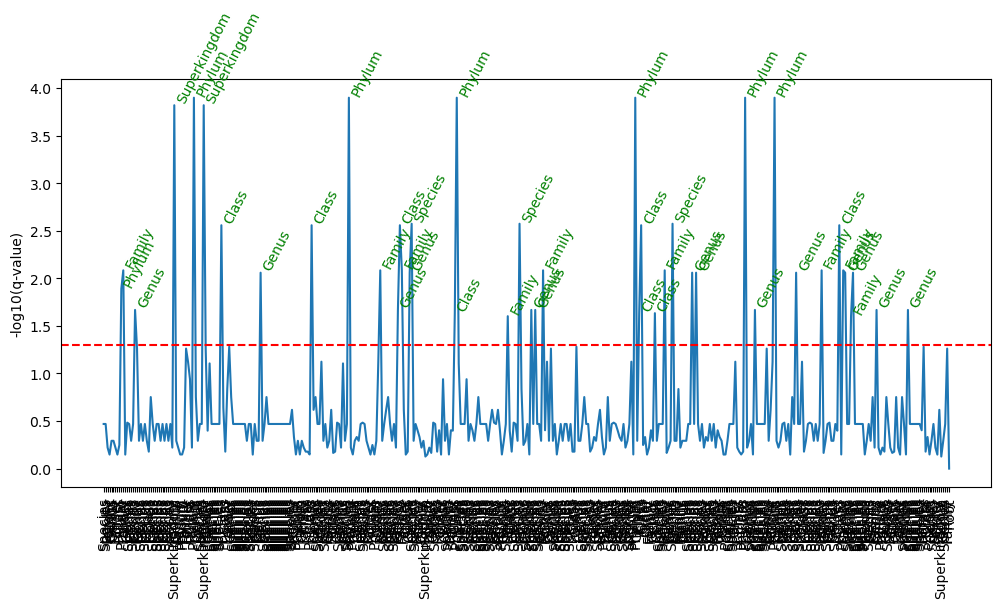

In [ ]:
# just to show the results of the significant ones based on the example data above
mtac_v = mtac
mtac_v[mtac_v < 1e-16] = 1e-16
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(-np.log10(mtac_v))
plt.xticks(range(len(taxrank)), taxrank, rotation=90)
plt.subplots_adjust(bottom=0.2)
ax.axhline(-np.log10(0.05), color='r', linestyle='--')
ax.set_ylabel("-log10(q-value)")
for i, label in enumerate(taxrank):
    if mtac_v[i] < 0.05:
        ax.text(i, -np.log10(mtac_v[i]), label, color='green', ha='left', va='bottom', rotation=62.5)
plt.show()